In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/hp/Desktop/financial_loan.xlsx - financial_loan.csv")

In [3]:
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
data.duplicated().sum()

np.int64(0)

In [13]:
data['issue_date'] = pd.to_datetime(data['issue_date'], errors = 'coerce')
data['last_credit_pull_date'] = pd.to_datetime(data['last_credit_pull_date'], errors = 'coerce')
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'], errors = 'coerce')

In [14]:
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [17]:
data.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date                object
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

### total loan application

In [19]:
total_loan_application = data['id'].count()
print(f"total number of loan application: {total_loan_application}")

total number of loan application: 38576


### MTD total application metric

In [30]:
from datetime import datetime


In [32]:
today = datetime.today()

In [34]:
mtd_load_application = data[(data['issue_date'].dt.month == today.month) & (data['issue_date'].dt.year == today.year)]
print(mtd_load_application)

Empty DataFrame
Columns: [id, address_state, application_type, emp_length, emp_title, grade, home_ownership, issue_date, last_credit_pull_date, last_payment_date, loan_status, next_payment_date, member_id, purpose, sub_grade, term, verification_status, annual_income, dti, installment, int_rate, loan_amount, total_acc, total_payment]
Index: []

[0 rows x 24 columns]


In [35]:
# as the data does not have any entries of currrent month or year
#we'll work on current yea data

In [47]:
latest_issue_date = data['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_applications = data[(data['issue_date'].dt.year == latest_year) & (data['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_applications['id'].count()
print("MTD Loan Applications:", mtd_loan_applications)

MTD Loan Applications: 4314


In [48]:
# MTD means the number of loan applications received from the start of the current month up to today’s date, but the data is hitorical so we will set thr current date as latest or last feeded yar and month, it;ll act as our current one. 


In [49]:
### toal funded amount

In [53]:
total_funds = data['loan_amount'].sum()
total_funds_inmillions = total_funds/1000000
print(f" The total amoutn of funds dispurdes as loans are: {total_funds_inmillions}")

 The total amoutn of funds dispurdes as loans are: 435.757075


In [54]:
### MTD total funded amount

In [57]:
latest_issue_date = data['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month


mtd = data[(data['issue_date'].dt.year == latest_year) & (data['issue_date'].dt.month == latest_month)]
mtd_funds = mtd['loan_amount'].sum()
mtd_funds_mil = mtd_funds/1000000
print(f" The mtd total funds are: {mtd_funds_mil}")

 The mtd total funds are: 53.981425


In [58]:
### total amount received from 

In [59]:
total_amount_received = data['total_payment'].sum()
total_amount = total_amount_received/1000000
print(f" The total amount received : {total_amount}")

 The total amount received : 473.070933


In [61]:
atest_issue_date = data['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month


mtd = data[(data['issue_date'].dt.year == latest_year) & (data['issue_date'].dt.month == latest_month)]
mtd_amount = mtd['total_payment'].sum()
mtd_amount_millionn = mtd_amount/1000000
print(f" The mtd total funds are: {mtd_amount_millionn}")

 The mtd total funds are: 58.07438


In [62]:
#avergae interest rate 

In [66]:
int_rate = data['int_rate'].mean()
rate = int_rate*100
print(f"{rate:.2f}%")

12.05%


In [70]:
dti_rate = data['dti'].mean()
dti = dti_rate*100
print(f"{dti:.2f}%")

13.33%


In [71]:
#good loan vs bad loan

In [73]:
data['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [88]:
good_loan = data[data['loan_status'].isin(['Fully Paid', 'Current'])]
bad_loan = data[data['loan_status'].isin(['Charged Off'])]

In [82]:
#good loan application percentage

In [83]:
#good loan application percentage
#good loan application
#good loan funded amount
#good loan total reeived amount

In [98]:
total_loan = data['id'].count()
good_loan_per = good_loan['id'].count()
total_loan_per =(good_loan_per/total_loan)*100
print(f"Good Loan Percentage: {total_loan_per:.2f}%")

Good Loan Percentage: 86.18%


In [100]:
good_loan_application = good_loan['id'].count()
print(f" the number of good loan application are: {good_loan_application}")

 the number of good loan application are: 33243


In [103]:
good_loan_funds = good_loan['loan_amount'].sum()
loan_funds = good_loan_funds/1000000
print(f" the good loan funded amoutns are: ${loan_funds}")

 the good loan funded amoutns are: $370.22485


In [105]:
total_amount_received = good_loan['total_payment'].sum()
amount_received = total_amount_received/1000000
print(f" total amount received is: ${amount_received}")

 total amount received is: $435.78617


In [106]:
#bad loan application percentage
#bad loan application
#bad loan funded amount
#bad loan total reeived amount

In [107]:
total_loan = data['id'].count()
bad_loan_per = bad_loan['id'].count()
total_loan_per =(bad_loan_per/total_loan)*100
print(f"bad Loan Percentage: {total_loan_per:.2f}%")

bad Loan Percentage: 13.82%


In [108]:
bad_loan_application = bad_loan['id'].count()
print(f" the number of bad loan application are: {bad_loan_application}")

 the number of bad loan application are: 5333


In [109]:
bad_loan_funds = bad_loan['loan_amount'].sum()
loan_funds = bad_loan_funds/1000000
print(f" the bad loan funded amoutns are: ${loan_funds}")

 the bad loan funded amoutns are: $65.532225


In [110]:
total_amount_received = bad_loan['total_payment'].sum()
amount_received = total_amount_received/1000000
print(f" total amount received is: ${amount_received}")

 total amount received is: $37.284763


In [134]:
### monthly trend by issue date for total funded amount

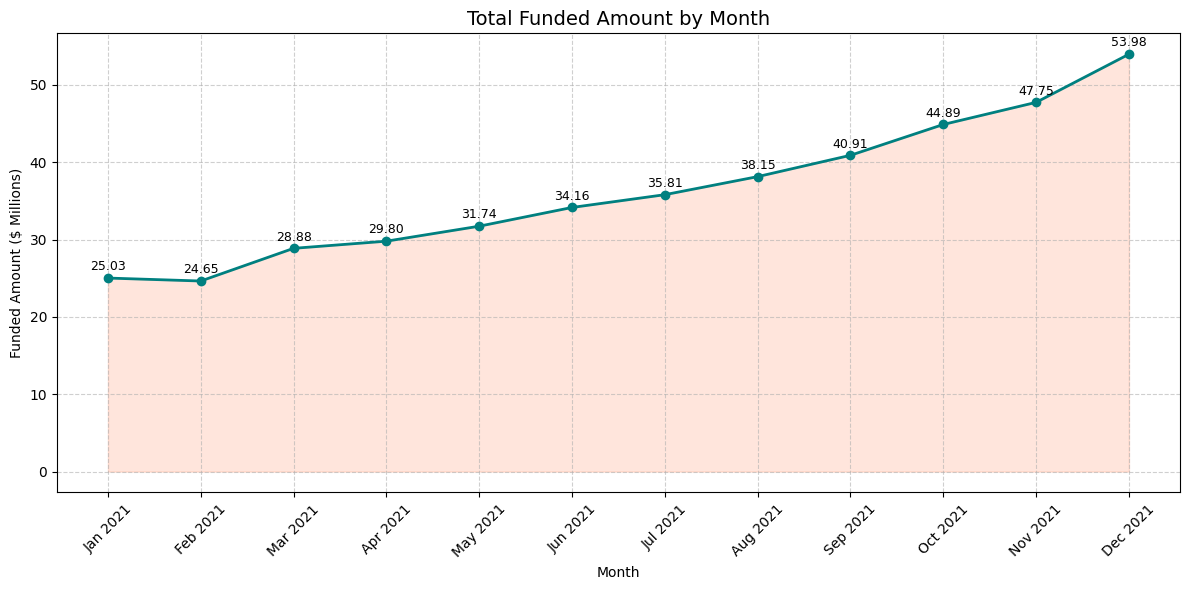

In [133]:
# Step 1: Convert date and create month-year column
data['month_year'] = data['issue_date'].dt.strftime('%b %Y')  # e.g. jan 2021

# step 2: Group and sum by month
monthly_trend = data.groupby('month_year')['loan_amount'].sum().reset_index()

# Step 3: Convert ONLY the loan_amount column to millions
monthly_trend['loan_amount'] = monthly_trend['loan_amount'] / 1_000_000

#  Step 4: Sort months properly
data_sorted = data.sort_values('issue_date')
order = data_sorted['issue_date'].dt.strftime('%b %Y').unique()
monthly_trend['month_year'] = pd.Categorical(monthly_trend['month_year'], categories=order, ordered=True)
monthly_trend = monthly_trend.sort_values('month_year')

#  Step 5: Plot line + area chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['month_year'], monthly_trend['loan_amount'], color='teal', marker='o', linewidth=2)
plt.fill_between(monthly_trend['month_year'], monthly_trend['loan_amount'], color='Coral', alpha=0.2)

#  Step 6: Add value labels
for i, value in enumerate(monthly_trend['loan_amount']):
    plt.text(i, value + 1, f"{value:.2f}", ha='center', fontsize=9, color='black')

#  Step 7: Titles & labels
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  monthly trend by issue date for total funded amount

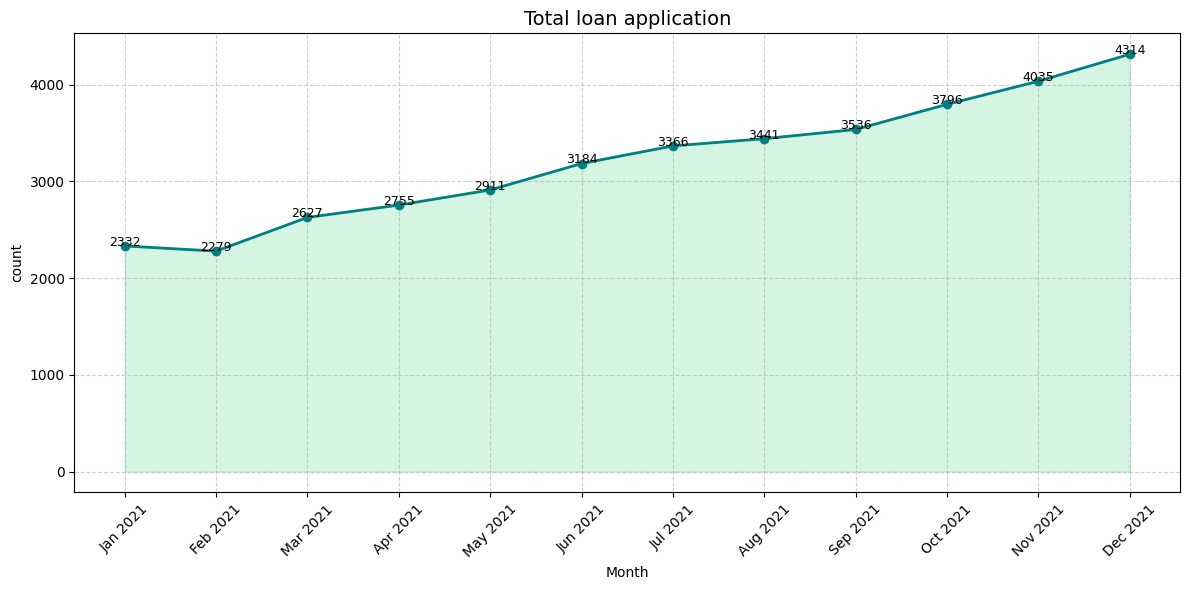

In [145]:
# Step 1: Convert date and create month-year column
data['month_year'] = data['issue_date'].dt.strftime('%b %Y')  # e.g. jan 2021

# step 2: Group and sum by month
monthly_trend = data.groupby('month_year')['id'].count().reset_index()

#  Step 4: Sort months properly
data_sorted = data.sort_values('issue_date')
order = data_sorted['issue_date'].dt.strftime('%b %Y').unique()
monthly_trend['month_year'] = pd.Categorical(monthly_trend['month_year'], categories=order, ordered=True)
monthly_trend = monthly_trend.sort_values('month_year')

#  Step 5: Plot line + area chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['month_year'], monthly_trend['id'], color='teal', marker='o', linewidth=2)
plt.fill_between(monthly_trend['month_year'], monthly_trend['id'], color='#2ECC71', alpha=0.2)

#  Step 6: Add value labels
for i, value in enumerate(monthly_trend['id']):
    plt.text(i, value + 1, f"{int(value)}", ha='center', fontsize=9, color='black')

#  Step 7: Titles & labels
plt.title('Total loan application', fontsize=14)
plt.xlabel('Month')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date " money received

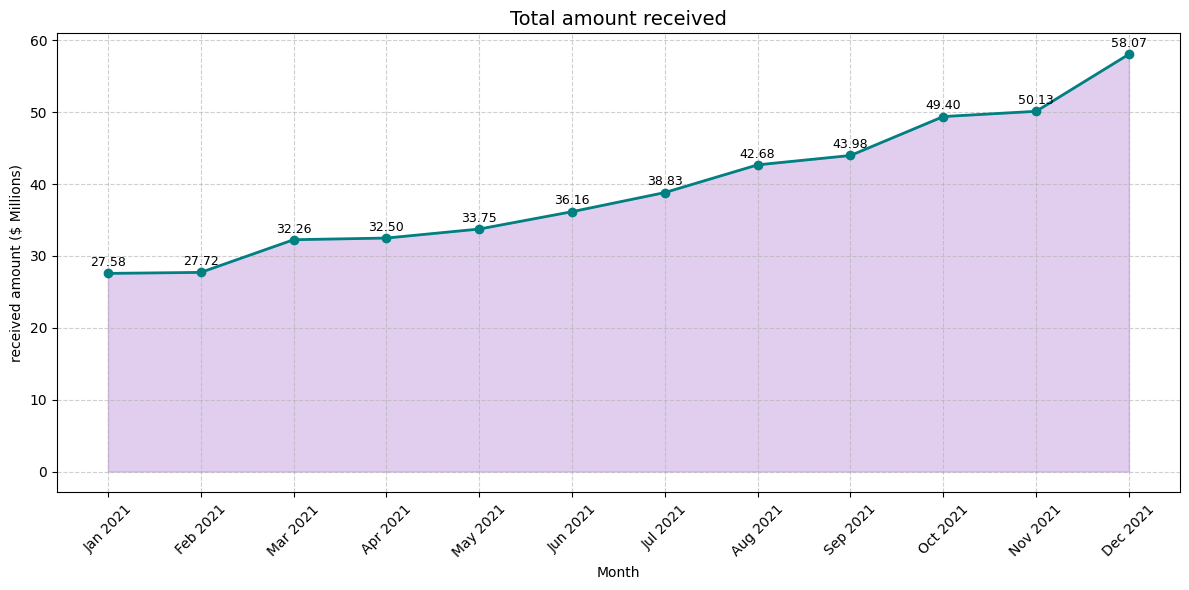

In [158]:
# Step 1: Convert date and create month-year column
data['month_year'] = data['issue_date'].dt.strftime('%b %Y')  # e.g. jan 2021

# step 2: Group and sum by month
monthly_trend = data.groupby('month_year')['total_payment'].sum().reset_index()

# Step 3: Convert ONLY the loan_amount column to millions
monthly_trend['total_payment'] = monthly_trend['total_payment'] / 1_000_000

#  Step 4: Sort months properly
data_sorted = data.sort_values('issue_date')
order = data_sorted['issue_date'].dt.strftime('%b %Y').unique()
monthly_trend['month_year'] = pd.Categorical(monthly_trend['month_year'], categories=order, ordered=True)
monthly_trend = monthly_trend.sort_values('month_year')

#  Step 5: Plot line + area chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['month_year'], monthly_trend['total_payment'], color='teal', marker='o', linewidth=2)
plt.fill_between(monthly_trend['month_year'], monthly_trend['total_payment'], color='#6A0DAD', alpha=0.2)

#  Step 6: Add value labels
for i, value in enumerate(monthly_trend['total_payment']):
    plt.text(i, value + 1, f"{value:.2f}", ha='center', fontsize=9, color='black')

#  Step 7: Titles & labels
plt.title('Total amount received', fontsize=14)
plt.xlabel('Month')
plt.ylabel('received amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State: total funded amount

C:\Users\hp\AppData\Local\Temp\ipykernel_19980\1424581065.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=regional_analysis, x="address_state", y="loan_amount", palette="crest")


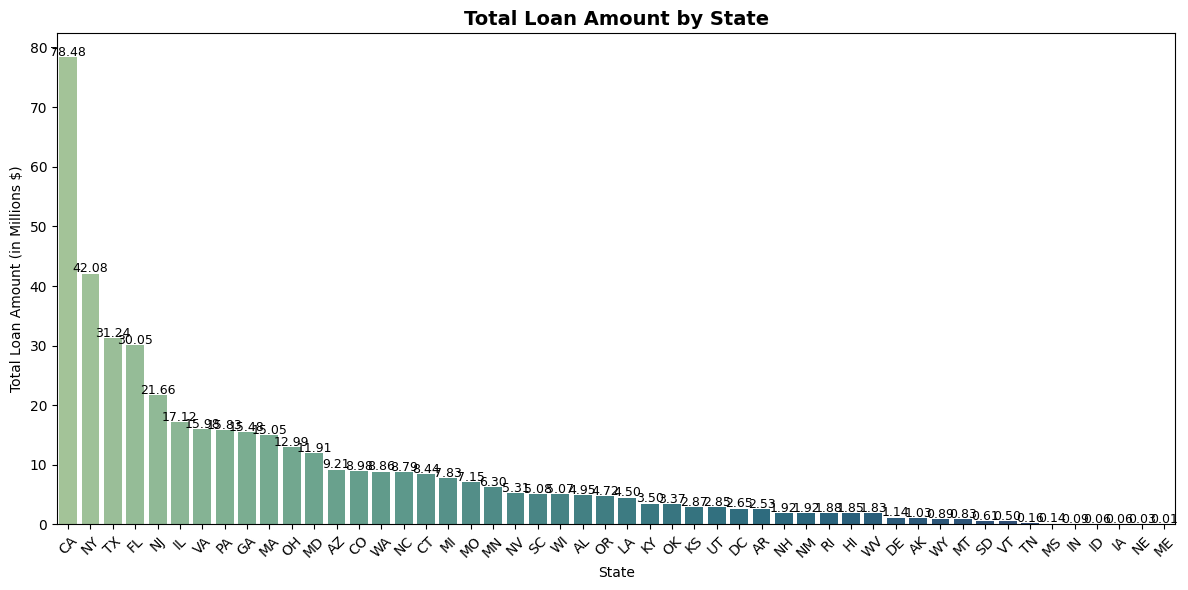

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Ensure 'loan_amount' is numeric
data['loan_amount'] = pd.to_numeric(data['loan_amount'], errors='coerce')

#  Group and sort
regional_analysis = data.groupby('address_state', as_index=False)['loan_amount'].sum()
regional_analysis['loan_amount'] = regional_analysis['loan_amount'] / 1_000_000  # Convert to millions
regional_analysis = regional_analysis.sort_values(by='loan_amount', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=regional_analysis, x="address_state", y="loan_amount", palette="crest")

# Add numbers on top of each bar
for i, value in enumerate(regional_analysis['loan_amount']):
    plt.text(i, value + 0.2, f"{value:.2f}", ha='center', fontsize=9, color='black')

# Labels and title
plt.title("Total Loan Amount by State", fontsize=14, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Loan Amount (in Millions $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Regional Analysis by State: loan amount

C:\Users\hp\AppData\Local\Temp\ipykernel_19980\1188953623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=regional_analysis, x="address_state", y="loan_amount", palette="mako")


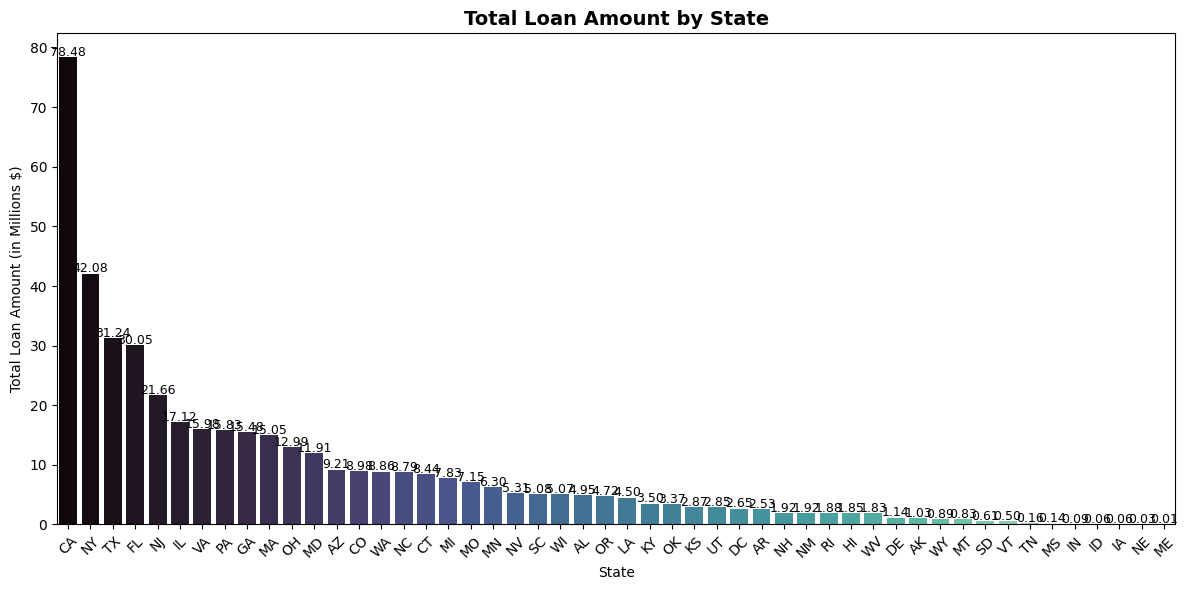

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Ensure 'loan_amount' is numeric
data['loan_amount'] = pd.to_numeric(data['loan_amount'], errors='coerce')

#  Group and sort
regional_analysis = data.groupby('address_state', as_index=False)['loan_amount'].sum()
regional_analysis['loan_amount'] = regional_analysis['loan_amount'] / 1_000_000  # Convert to millions
regional_analysis = regional_analysis.sort_values(by='loan_amount', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=regional_analysis, x="address_state", y="loan_amount", palette="mako")

# Add numbers on top of each bar
for i, value in enumerate(regional_analysis['loan_amount']):
    plt.text(i, value + 0.2, f"{value:.2f}", ha='center', fontsize=9, color='black')

# Labels and title
plt.title("Total Loan Amount by State", fontsize=14, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Loan Amount (in Millions $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Regional Analysis by State

C:\Users\hp\AppData\Local\Temp\ipykernel_19980\4069798887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_analysiss, x="address_state", y="id", palette="Spectral")


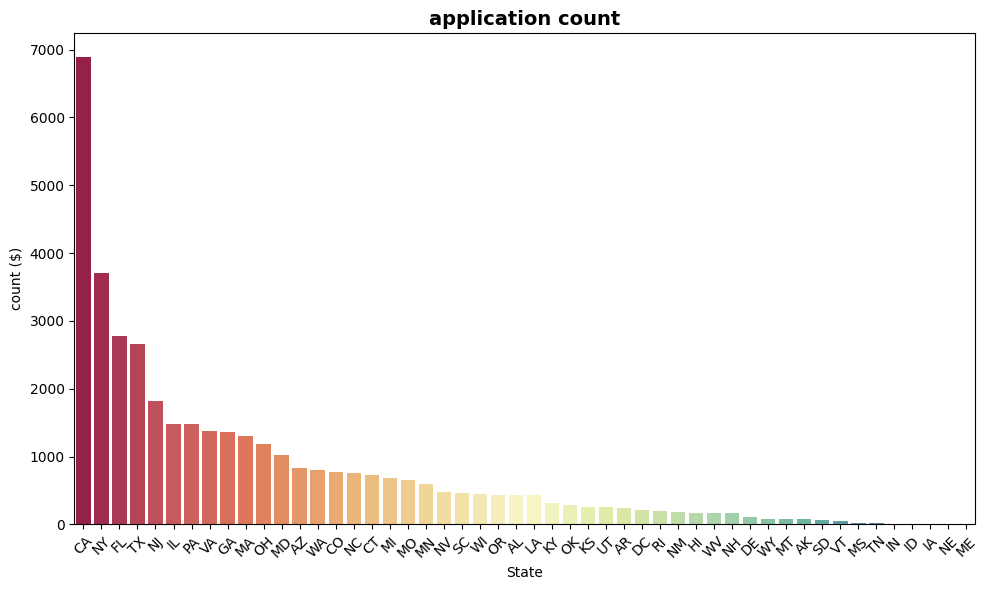

In [170]:
regional_analysiss = data.groupby('address_state', as_index=False)['id'].count()
regional_analysiss = regional_analysiss.sort_values(by='id', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=regional_analysiss, x="address_state", y="id", palette="Spectral")

plt.title("application count", fontsize=14, fontweight='bold')
plt.xlabel("State")
plt.ylabel("count ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Loan Term Analysis by Total Funded Amount

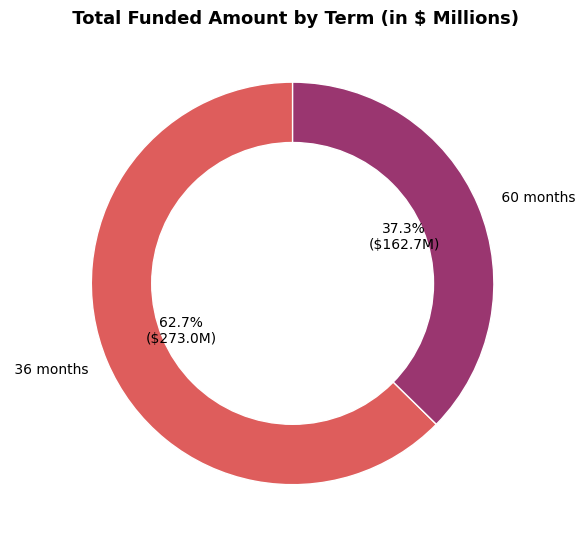

In [173]:

term_funding_millions = data.groupby('term')['loan_amount'].sum() / 1_000_000

# Create donut chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette("flare", len(term_funding_millions))  # 🔥 try "crest", "mako", "viridis", "icefire"

plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n(${p * sum(term_funding_millions) / 100:.1f}M)",
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}
)

# Add a white circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(centre_circle)

# Title
plt.title(" Total Funded Amount by Term (in $ Millions)", fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


### Group and sum loan amounts by employment length (convert to millions)

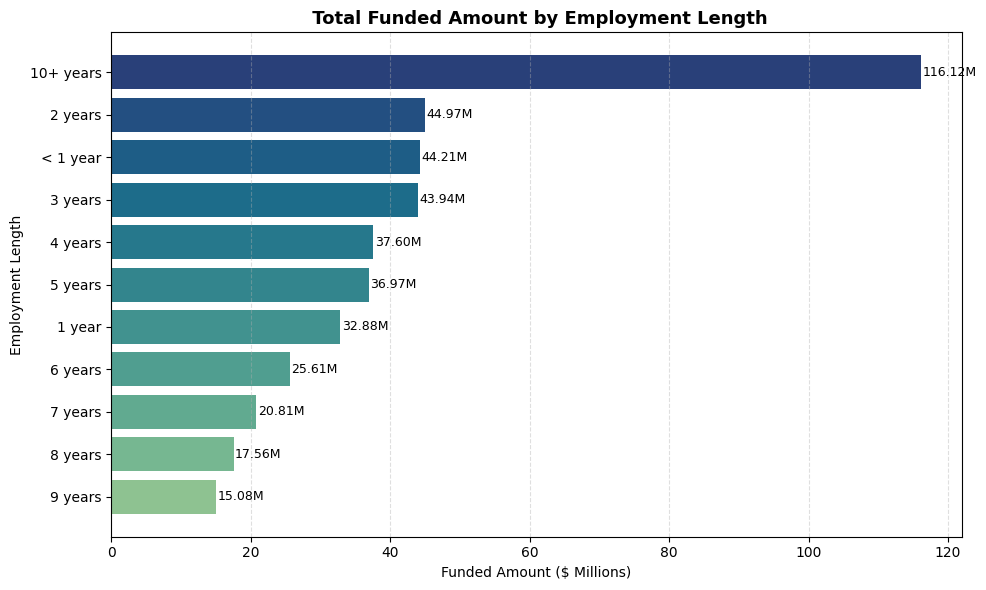

In [175]:

emp_funding = data.groupby('emp_length')['loan_amount'].sum().sort_values() / 1_000_000

#  Create horizontal bar chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("crest", len(emp_funding))  
bars = plt.barh(emp_funding.index, emp_funding.values, color=colors)

#  Add text labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2,               # X position (a bit to the right of the bar)
             bar.get_y() + bar.get_height()/2,  # Center vertically
             f"{width:.2f}M",           # Show value in millions
             va='center', fontsize=9, color='black')

#  Labels and Title
plt.xlabel("Funded Amount ($ Millions)")
plt.ylabel("Employment Length")
plt.title(" Total Funded Amount by Employment Length", fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Group and sum loan amount by purpose (in millions)

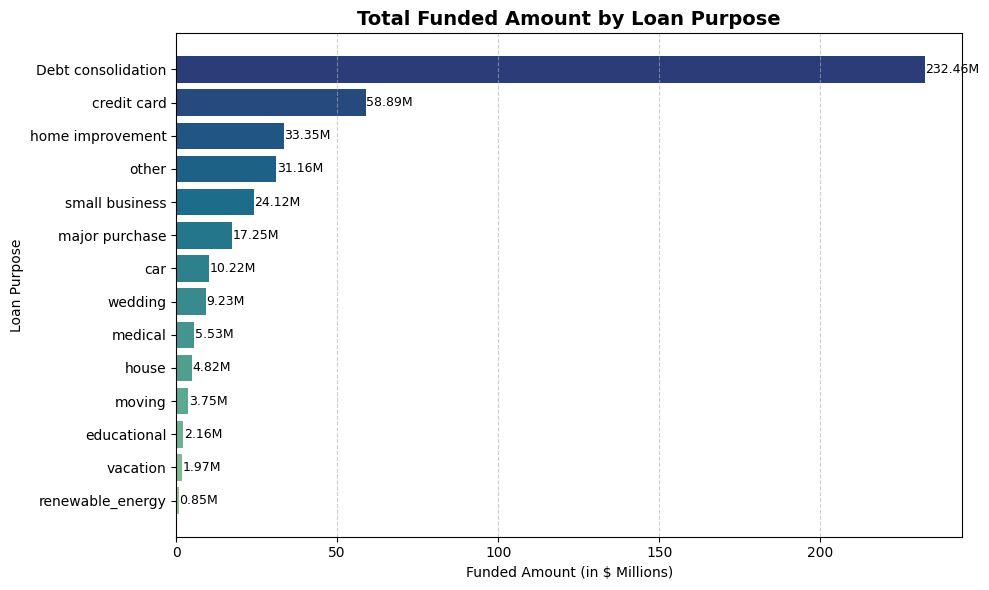

In [177]:

purpose_funding_millions = (data.groupby('purpose')['loan_amount'].sum().sort_values() / 1_000_000
)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    purpose_funding_millions.index,
    purpose_funding_millions.values,
    color=sns.color_palette("crest", len(purpose_funding_millions))
)

# Add data labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.2,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}M",
        va='center', fontsize=9, color='black'
    )

# Titles and labels
plt.title("Total Funded Amount by Loan Purpose", fontsize=14, fontweight='bold')
plt.xlabel("Funded Amount (in $ Millions)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
